### Linear Regression

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import mglearn


X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [2]:
# coef_ : 기울기 파라미터 w (가중치)
# intercept_ : 절편 파라미터 b (편향)

print('lr.coef_:', lr.coef_)
print('lr.intercept_:', lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [3]:
print('train set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('test set score: {:.2f}'.format(lr.score(X_test, y_test)))
# 과소 적합인 상태

train set score: 0.67
test set score: 0.66


In [7]:
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

# boston = load_boston()
# X = boston.data
# y = boston.target
X, y = mglearn.datasets.load_extended_boston()


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [8]:
print('train set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('test set score: {:.2f}'.format(lr.score(X_test, y_test)))

train set score: 0.95
test set score: 0.61


### Ridge

In [9]:
from sklearn.linear_model import Ridge

# 디폴트 alpha = 1.0
ridge = Ridge().fit(X_train, y_train)
print('trainset score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('testset score: {:.2f}'.format(ridge.score(X_test, y_test)))

trainset score: 0.89
testset score: 0.75


In [14]:
# alpha 값을 높여서 제약을 더 주는 경우
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('trainset score: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('testset score: {:.2f}'.format(ridge10.score(X_test, y_test)))

ridge10.coef_

trainset score: 0.79
testset score: 0.64


array([-8.11609631e-01,  6.47608896e-01, -8.09783229e-01,  3.11334709e-01,
       -6.84623747e-01,  4.38797575e+00, -1.47554474e-01, -2.44214065e+00,
        8.45915099e-01, -1.14727508e+00, -2.33162040e+00,  1.06787015e+00,
       -3.98391025e+00, -5.98636976e-01,  2.93228193e-03, -5.21253823e-01,
        1.40339673e-01, -6.45256057e-01, -7.61400539e-01, -7.47231171e-01,
       -3.86298005e-02, -8.29808059e-01, -7.52859756e-01, -6.75605899e-01,
       -8.72001488e-01, -3.23330640e-01,  1.27336327e+00, -3.37279550e-01,
        6.30682038e-02,  2.37092897e-01,  2.09805607e+00,  1.00996768e-01,
       -2.79529662e-01,  1.73222619e-01, -3.33557850e-01, -3.74226653e-01,
        6.98414808e-01, -6.96284918e-01,  7.79521010e-01,  3.74843210e-01,
       -6.24101244e-01, -7.63657605e-01,  4.35756439e-02, -1.04000852e+00,
        4.24401576e-01,  4.78687021e-01, -3.84125445e-01, -9.93802653e-02,
       -1.30226356e+00,  3.11334709e-01, -5.92097637e-01,  6.33816542e-01,
        6.66792895e-01, -

In [12]:
# alpha 값을 낮춰서 제약을 푸는 경우 : Linear Regression과 비슷해짐
ridge0 = Ridge(alpha=0).fit(X_train, y_train)
print('trainset score: {:.2f}'.format(ridge0.score(X_train, y_train)))
print('testset score: {:.2f}'.format(ridge0.score(X_test, y_test)))

trainset score: 0.95
testset score: 0.61


In [13]:
# alpha : 0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('trainest score: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('testset scoreL: {:.2f}'.format(ridge01.score(X_test, y_test)))

trainest score: 0.93
testset scoreL: 0.77


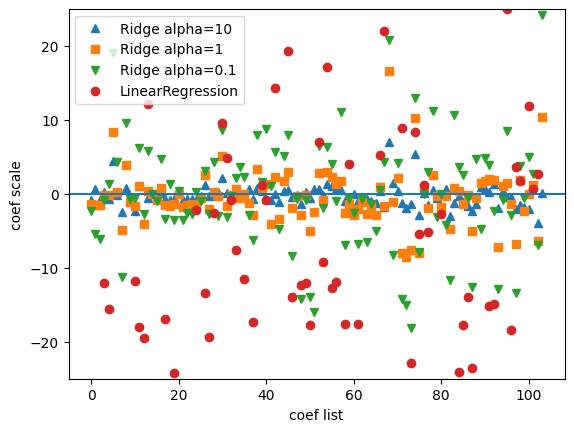

In [15]:
# alpha 값에 따라 달라지는 coef_ 속성 시각화
import matplotlib.pyplot as plt

plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('coef list')
plt.ylabel('coef scale')
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

### Lasso

In [16]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print('trainset score : {:.2f}'.format(lasso.score(X_train, y_train)))
print('testset score : {:.2f}'.format(lasso.score(X_test, y_test)))
print('feature number: ', np.sum(lasso.coef_ !=0))

# 과소 적합으로, 전체 104개의 feature 중에 4개만 사용함
# alpha를 너무 강하게 사용하였기 때문에 너무 많은 feature들을 0으로 보내버림

trainset score : 0.29
testset score : 0.21
feature number:  4


In [18]:
# alpha = 0.8
lasso08 = Lasso(alpha=0.8).fit(X_train, y_train)
print('trainset score : {:.2f}'.format(lasso08.score(X_train, y_train)))
print('testset score : {:.2f}'.format(lasso08.score(X_test, y_test)))
print('feature number: ', np.sum(lasso08.coef_ !=0))

trainset score : 0.42
testset score : 0.32
feature number:  4


In [19]:
lasso06 = Lasso(alpha=0.6).fit(X_train, y_train)
print('trainset score : {:.2f}'.format(lasso06.score(X_train, y_train)))
print('testset score : {:.2f}'.format(lasso06.score(X_test, y_test)))
print('feature number: ', np.sum(lasso06.coef_ !=0))

trainset score : 0.55
testset score : 0.44
feature number:  6


In [21]:
lasso04 = Lasso(alpha=0.4).fit(X_train, y_train)
print('trainset score : {:.2f}'.format(lasso04.score(X_train, y_train)))
print('testset score : {:.2f}'.format(lasso04.score(X_test, y_test)))
print('feature number: ', np.sum(lasso04.coef_ !=0))

trainset score : 0.67
testset score : 0.54
feature number:  6


In [22]:
lasso02 = Lasso(alpha=0.2).fit(X_train, y_train)
print('trainset score : {:.2f}'.format(lasso02.score(X_train, y_train)))
print('testset score : {:.2f}'.format(lasso02.score(X_test, y_test)))
print('feature number: ', np.sum(lasso02.coef_ !=0))

trainset score : 0.74
testset score : 0.60
feature number:  7


In [23]:
lasso01 = Lasso(alpha=0.1).fit(X_train, y_train)
print('trainset score : {:.2f}'.format(lasso01.score(X_train, y_train)))
print('testset score : {:.2f}'.format(lasso01.score(X_test, y_test)))
print('feature number: ', np.sum(lasso01.coef_ !=0))

trainset score : 0.77
testset score : 0.63
feature number:  8


In [24]:
lasso0001 = Lasso(alpha=0.001).fit(X_train, y_train)
print('trainset score : {:.2f}'.format(lasso0001.score(X_train, y_train)))
print('testset score : {:.2f}'.format(lasso0001.score(X_test, y_test)))
print('feature number: ', np.sum(lasso0001.coef_ !=0))

trainset score : 0.94
testset score : 0.75
feature number:  76


In [25]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print('trainset score : {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('testset score : {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('feature number: ', np.sum(lasso00001.coef_ !=0))

trainset score : 0.94
testset score : 0.70
feature number:  100


Text(0, 0.5, 'feature scale')

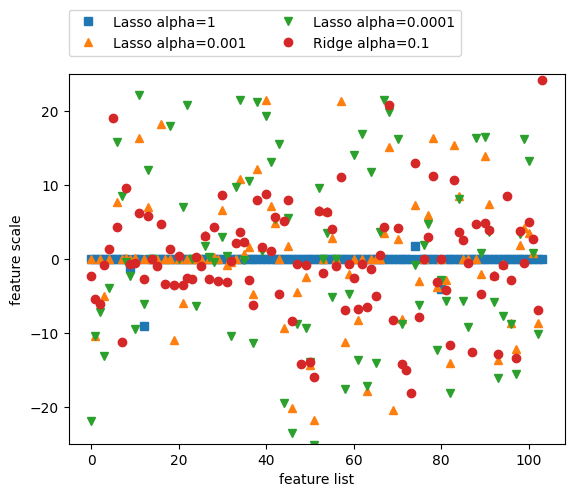

In [26]:
# alpha에 따라 달라지는 Lasso 시각화하기
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso0001.coef_, '^', label='Lasso alpha=0.001')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25, 25)
plt.xlabel('feature list')
plt.ylabel('feature scale')